In [3]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
output_notebook()

Loading BokehJS ...

In [4]:
def get_product_agg(cols):
    bimbo_train = pd.read_csv('C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\train.csv',
                              nrows=1000000, usecols=['Semana', 'Producto_ID'] + cols,
                             dtype = {'Semana': 'int32',
                                    'Producto_ID': 'int32',
                                    'Venta_hoy': 'float32',
                                    'Venta_uni_hoy': 'int32',
                                    'Dev_uni_proxima': 'int32',
                                    'Dev_proxima': 'float32',
                                    'Demanda_uni_equil': 'int32'})
    agg = bimbo_train.groupby(['Semana', 'Producto_ID'], as_index=False).agg(['count', 'sum', 'min', 'max', 'median', 'mean'])
    agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
    del(bimbo_train)
    return agg

In [5]:
agg1 = get_product_agg(['Demanda_uni_equil', 'Dev_uni_proxima'])

In [6]:
agg1.shape

(512, 12)

In [7]:
agg1.head()

Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      72                            2935                  397   
       73                            6369                  440   
       108                              6                    0   
       141                            353                   67   
       145                             66                    2   

                    Dev_uni_proxima_min  Dev_uni_proxima_max  \
Semana Producto_ID                                             
3      72                             0                   33   
       73                             0                    4   
       108                            0                    0   
       141                            0                    4   
       145                            0                    1   

                    Dev_uni_proxima_median  Dev_uni_proxima_mean  \
Semana Producto_ID                                                 
3      72                              0.0              0.135264   
       73                              0.0              0.069085   
       108                             0.0              0.000000   
       141                             0.0              0.189802   
       145                             0.0              0.030303   

                    Demanda_uni_equil_count  Demanda_uni_equil_sum  \
Semana Producto_ID                                                   
3      72                              2935                  14707   
       73                              6369                  13081   
       108                                6                    656   
       141                              353                   1860   
       145                               66                    966   

                    Demanda_uni_equil_min  Demanda_uni_equil_max  \
Semana Producto_ID                                                 
3      72                               0                     46   
       73                               0                     39   
       108                             16                    280   
       141                              0                     77   
       145                              0                    115   

                    Demanda_uni_equil_median  Demanda_uni_equil_mean  
Semana Producto_ID                                                    
3      72                                4.0                5.010903  
       73                                2.0                2.053855  
       108                              32.0              109.333333  
       141                               2.0                5.269122  
       145                               3.0               14.636364

In [8]:
agg2 = get_product_agg(['Venta_uni_hoy'])
agg = agg1.join(agg2)

In [9]:
products = pd.read_csv('C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\producto_tabla.csv')

In [10]:
products['short_name'] = products.NombreProducto.str.extract('^(\D*)', expand=False)

In [11]:
products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$', expand=False)

In [12]:
w = products.NombreProducto.str.extract('(\d+)(Kg|g)', expand=True)

In [13]:
products['weight'] = w[0].astype('float')*w[1].map({"Kg":1000, 'g':1})

In [14]:
products['pieces'] = products.NombreProducto.str.extract('(\d+)p', expand=False).astype('float')

In [15]:
products.head()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0


In [16]:
products.tail()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral,WON,180.0,NaN
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral,WON,180.0,NaN
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int,WON,200.0,0.0
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int,WON,200.0,0.0
2591,49997,Tostado Int 0pct Grasa Azuc 200g TAB WON 49997,Tostado Int,WON,200.0,0.0


In [17]:
products.short_name.value_counts(dropna=False)

Pan Blanco                       39
Tortillinas                      37
Deliciosas Vainilla              35
Medias Noches                    25
Wonder                           22
Pan Integral                     19
Deliciosas Chochitos             17
Canelitas                        17
Suavicremas Chocolate            17
Suavicremas Vainilla             17
Choco Roles                      16
Suavicremas Fresa                16
Mantecadas Nuez                  15
Chocochispas                     15
Tostada Ondulada Tubo            15
Canapinas                        15
Tostado                          14
Barritas Fresa                   14
Barritas Pina                    13
Bran Frut Fresa                  12
Triki Trakes                     12
Deliciosas Chocochispas          12
Barra Multigrano Nuez            12
Mantecadas                       12
Totopo Chilaquiles               12
Plativolos                       12
Galleta Gansito                  12
Bollos BK                   

In [18]:
%matplotlib inline

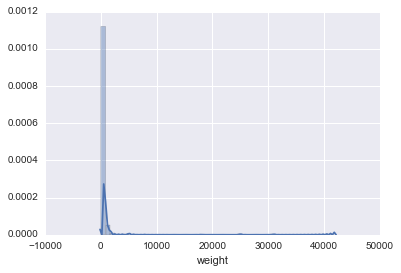

In [19]:
sns.distplot(products.weight.dropna())

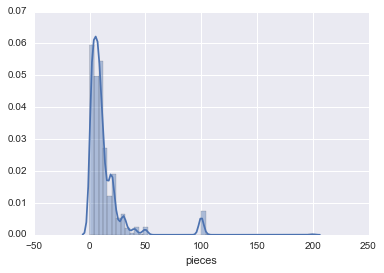

In [20]:
sns.distplot(products.pieces.dropna())

In [21]:
bimbo = (pd.merge(agg1.reset_index(), products, on='Producto_ID', how='left').
        groupby('short_name')['Demanda_uni_equil_sum'].sum().sort_values(ascending=False))

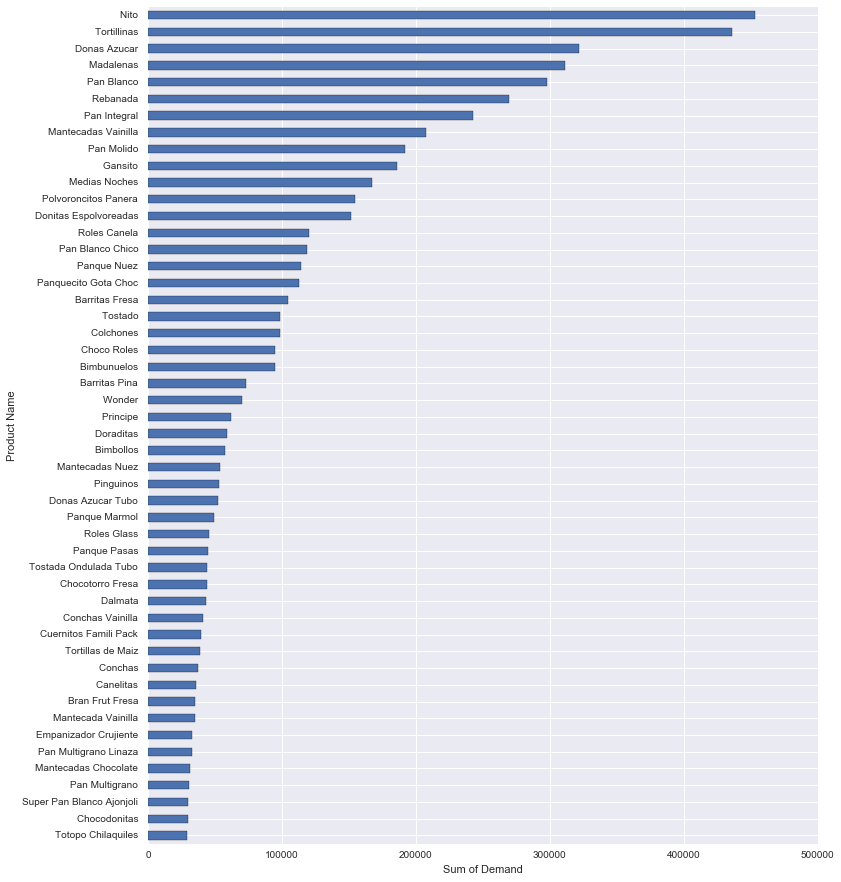

In [22]:
plt.figure(figsize = (12,15))
bimbo.head(50).sort_values().plot(kind='barh')
plt.ylabel('Product Name')
plt.xlabel('Sum of Demand')

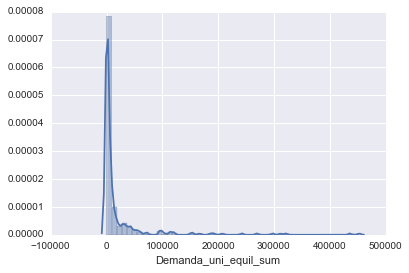

In [23]:
sns.distplot(bimbo)

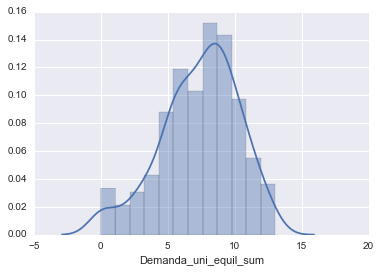

In [24]:
sns.distplot(np.log1p(bimbo))

In [25]:
bimbo1 = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
          groupby('short_name')['Demanda_uni_equil_sum', 'Venta_uni_hoy_sum', 'Dev_uni_proxima_sum', 'Dev_uni_proxima_count']
          .sum().sort_values(by = 'Demanda_uni_equil_sum', ascending=False))

In [26]:
bimbo1.describe().T #There are 

,count,mean,std,min,25%,50%,75%,max
Demanda_uni_equil_sum,303.0,21718.445545,58594.666081,0.0,242.0,2618.0,11494.5,453037.0
Venta_uni_hoy_sum,303.0,21936.310231,59003.845034,0.0,242.0,2618.0,11729.5,455123.0
Dev_uni_proxima_sum,303.0,295.181518,617.623117,0.0,4.0,55.0,251.5,5006.0
Dev_uni_proxima_count,303.0,3300.330033,7650.942772,1.0,17.0,148.0,2676.0,46870.0


In [27]:
bimbo1[bimbo1.Demanda_uni_equil_sum == 0].count()

Demanda_uni_equil_sum    10
Venta_uni_hoy_sum        10
Dev_uni_proxima_sum      10
Dev_uni_proxima_count    10
dtype: int64

In [28]:
bimbo1[bimbo1.Demanda_uni_equil_sum == 0]
#There are products with 0 sales but have returns

,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Deliciosas Chocolate,0,0,4,2
Principe mas Navigalleta,0,0,9,5
Raztachoc,0,0,8,4
Galleta Confeti,0,0,3,1
Duo Bran Fresa Pina,0,0,5,2
Bolsita Surtido Rico,0,0,2,2
Sponch Navidad,0,0,1,1
Bran Frut con Avena,0,0,25,2
Bran Frut Mango,0,0,4,2


In [29]:
bimbo1[bimbo1.Venta_uni_hoy_sum == 0]
# products never returned?

,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Deliciosas Chocolate,0,0,4,2
Principe mas Navigalleta,0,0,9,5
Raztachoc,0,0,8,4
Galleta Confeti,0,0,3,1
Duo Bran Fresa Pina,0,0,5,2
Bolsita Surtido Rico,0,0,2,2
Sponch Navidad,0,0,1,1
Bran Frut con Avena,0,0,25,2
Bran Frut Mango,0,0,4,2


In [30]:
bimbo1[bimbo1.Dev_uni_proxima_sum == 0].count()

Demanda_uni_equil_sum    47
Venta_uni_hoy_sum        47
Dev_uni_proxima_sum      47
Dev_uni_proxima_count    47
dtype: int64

In [31]:
bimbo1[bimbo1.Dev_uni_proxima_sum == 0].head(20)

,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Principe KC,3732,3732,0,81
Bollos,2618,2618,0,265
Panera Donas Azucar,1405,1405,0,14
Decanelas,1070,1070,0,226
Bollos BK,1014,1014,0,26
English Muffins Natural,747,747,0,32
Baguette Precocida Cong,728,728,0,7
Bollos Carls Jr,709,709,0,5
Pan Multigrano Twin,320,320,0,3


In [32]:
#Using qcut to cut the data into 10 quantiles
bimbo1['Q'] = pd.qcut(bimbo1.Demanda_uni_equil_sum, 10)
bimbo1.Q.value_counts()

(48418.6, 453037]     31
(992.8, 2618]         31
[0, 32.2]             31
(18122.2, 48418.6]    30
(8901.6, 18122.2]     30
(4702.6, 8901.6]      30
(2618, 4702.6]        30
(406.2, 992.8]        30
(177, 406.2]          30
(32.2, 177]           30
dtype: int64

In [33]:
bimbo1[bimbo1.Q == '[0, 49]'].index.values
# Why is it return nothing?

array([], dtype=object)

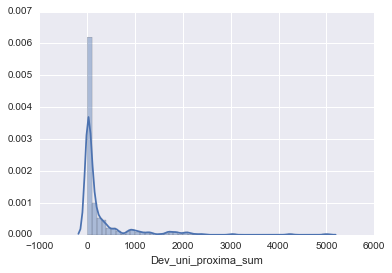

In [34]:
sns.distplot(bimbo1.Dev_uni_proxima_sum)

In [35]:
from nltk.corpus import stopwords

In [36]:
print(stopwords.words('spanish'))

[u'de', u'la', u'que', u'el', u'en', u'y', u'a', u'los', u'del', u'se', u'las', u'por', u'un', u'para', u'con', u'no', u'una', u'su', u'al', u'lo', u'como', u'm\xe1s', u'pero', u'sus', u'le', u'ya', u'o', u'este', u's\xed', u'porque', u'esta', u'entre', u'cuando', u'muy', u'sin', u'sobre', u'tambi\xe9n', u'me', u'hasta', u'hay', u'donde', u'quien', u'desde', u'todo', u'nos', u'durante', u'todos', u'uno', u'les', u'ni', u'contra', u'otros', u'ese', u'eso', u'ante', u'ellos', u'e', u'esto', u'm\xed', u'antes', u'algunos', u'qu\xe9', u'unos', u'yo', u'otro', u'otras', u'otra', u'\xe9l', u'tanto', u'esa', u'estos', u'mucho', u'quienes', u'nada', u'muchos', u'cual', u'poco', u'ella', u'estar', u'estas', u'algunas', u'algo', u'nosotros', u'mi', u'mis', u't\xfa', u'te', u'ti', u'tu', u'tus', u'ellas', u'nosotras', u'vosostros', u'vosostras', u'os', u'm\xedo', u'm\xeda', u'm\xedos', u'm\xedas', u'tuyo', u'tuya', u'tuyos', u'tuyas', u'suyo', u'suya', u'suyos', u'suyas', u'nuestro', u'nuestra', 

In [37]:
products['short_name_processed'] = (products['short_name']
                                       .map(lambda x: " ".join([for in in x.lower()
                                                               .split() if i not in stopwords.words('spanish')])))

SyntaxError: invalid syntax (<ipython-input-37-59fc86cff573>, line 2)